In [ ]:
! pip install pyod

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score


import warnings
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import evaluate_print
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import ConstantInputWarning

warnings.simplefilter("ignore", ConstantInputWarning)


In [3]:
url = "https://drive.google.com/uc?export=download&id=1DcCBBOePZR6CI4OMoveaR2yn9n8_oGMt"

df = pd.read_csv(url)

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
df.columns

Index(['timestamp', 'building_id', 'meter_reading', 'anomaly'], dtype='object')

In [6]:
scaler = StandardScaler()
X = df[['meter_reading']].values
X_scaled = scaler.fit_transform(X)
X=X_scaled

In [7]:
clf_ae = AutoEncoder(hidden_neuron_list=[8, 4, 4, 8], epoch_num=50, batch_size=32, contamination=0.1)


In [8]:
clf_ae.fit(X_scaled)

Training: 100%|██████████| 50/50 [4:16:01<00:00, 307.24s/it]


In [9]:
y_predict_ae = clf_ae.predict(X_scaled)
y_scores_ae = clf_ae.decision_scores_

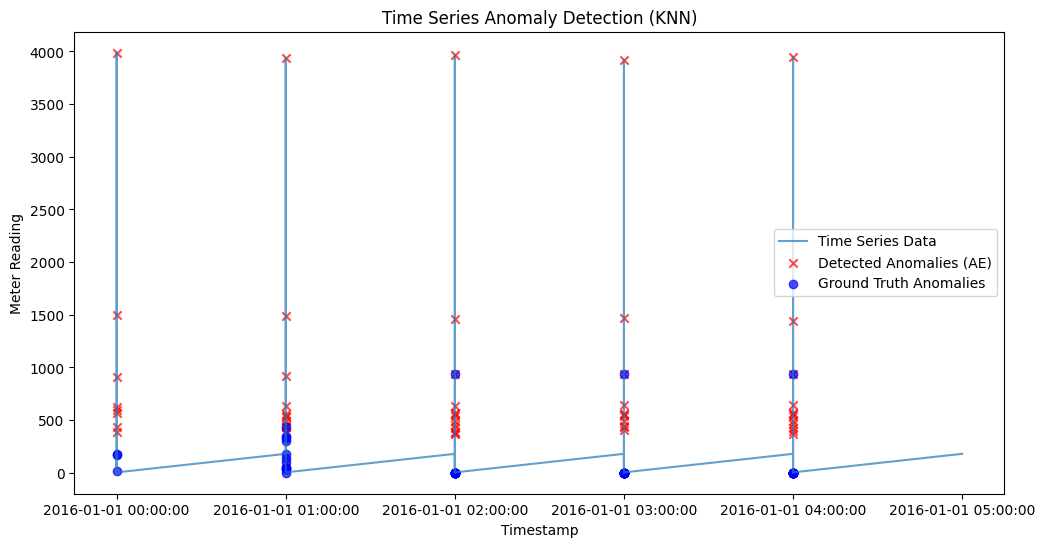

In [10]:
df_subset = df.iloc[:1000]

y_pred_ae_subset = y_predict_ae[:1000]

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_ae_subset == 1], df_subset['meter_reading'][y_pred_ae_subset == 1],
            color='red', marker='x', label='Detected Anomalies (AE)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1],
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (KNN)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()


In [12]:
print(classification_report(df['anomaly'], y_predict_ae))
accuracy = accuracy_score(df['anomaly'], y_predict_ae)

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94   1712198
         1.0       0.02      0.07      0.03     37296

    accuracy                           0.88   1749494
   macro avg       0.50      0.49      0.48   1749494
weighted avg       0.96      0.88      0.92   1749494



In [13]:
accuracy*100

88.19870202469971